# Advanced Algorithms and Parallel Programming
## Summer Session Project on Advanced Algorithms
## Student: Samuel Polo - 10670388

# OPT2 Notebook

In [19]:
import graph_tool.all as gt
import numpy as np

<Graph object, directed, with 8 vertices and 11 edges, 1 internal vertex property, 1 internal edge property, at 0x7fefdcfc73a0>


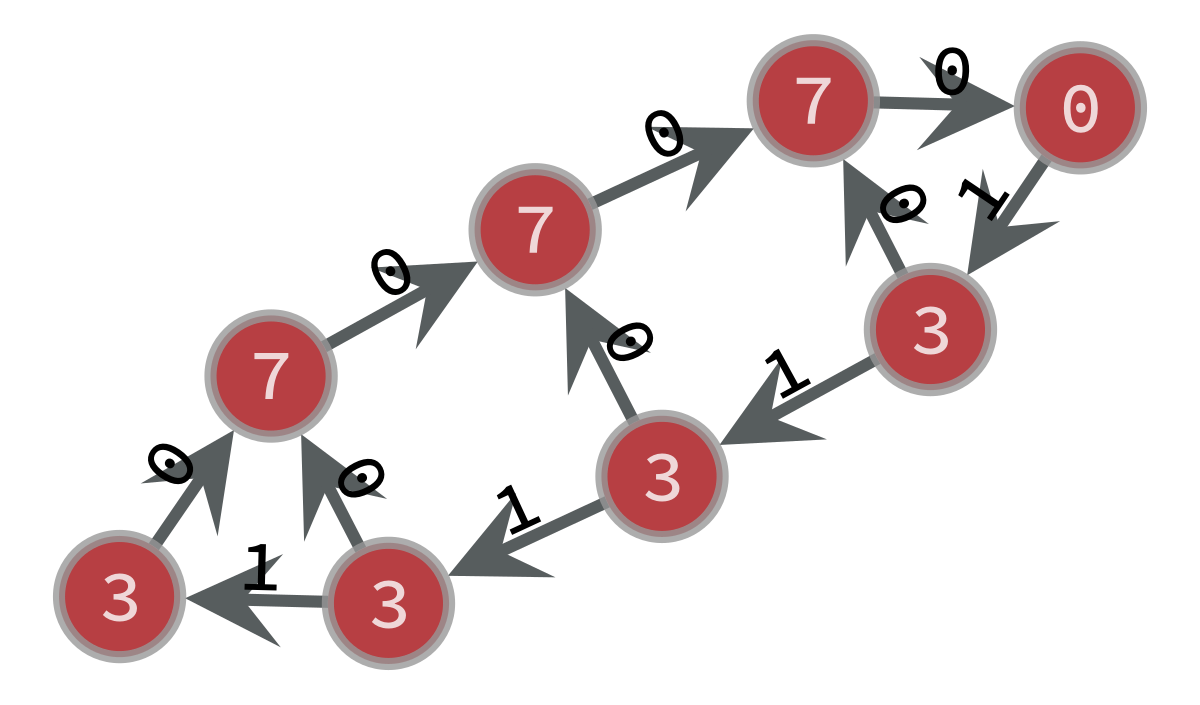

Vertex 0 with capacity: 0
Vertex 1 with capacity: 3
Vertex 2 with capacity: 3
Vertex 3 with capacity: 3
Vertex 4 with capacity: 3
Vertex 5 with capacity: 7
Vertex 6 with capacity: 7
Vertex 7 with capacity: 7
cap            (vertex)  (type: int32_t)
weight         (edge)    (type: double)
None


In [20]:
g = gt.Graph()

edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight
edge_str_weight = g.new_edge_property("string")

vlist = g.add_vertex(8) #Creation of vertices. Array of Vertices 

edges = [[0,1],[1,7],[1,2],[2,6],[2,3],[3,4],[3,5],[4,5],[5,6],[6,7],[7,0]] #array of Edges 

nodeCapacity = [0,3,3,3,3,7,7,7] #Aka "d(node_i)" #Array d(v) in the paper (Propagation delay)

cap = g.new_vertex_property("int")

weights = [1,0,1,0,1,1,0,0,0,0,0,0] #array of weights "w" (Register count) 
#print(edges[0][1])

for i in range(len(list(vlist))):
    cap[i] = nodeCapacity[i]

g.vertex_properties["cap"] = cap    #Array d(v) in the paper (Propagation delay)

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    g.ep.weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
print(g)
gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=edge_str_weight)

for v in g.vertices():
    print("Vertex %s with capacity: %s" % (v, g.vp.cap[v]))
    
print(g.list_properties())

In [21]:
def WD(graph): #Algorithm WD that computes both the W and the D matrix from a known graph. 
    W = np.zeros((g.num_vertices(),g.num_vertices())) #Initialize W Matrix
    D = np.zeros((g.num_vertices(),g.num_vertices())) #Initialize D Matrix
    print(W)
    print(D)

    g2 = gt.Graph(graph) #Copy the graph to perform other operations.

    ordered_pair = g2.new_edge_property("vector<int>")
    g2.edge_properties["weight_pair"] = ordered_pair

    for edge in g.edges():
        g2.ep.weight_pair[edge] = [graph.ep.weight[edge], graph.vp.cap[edge.source()]*(-1)]

    for i in range(graph.num_vertices()):
        for j in range(graph.num_vertices()):
            if (i!=j): #Exclude the same node path calculation.
                #Calculate the total weight of the path we just got.
                path = gt.shortest_path(g2, i, j)
                weightSum = [0,0] #Ordered pair weightSum [x,y] that will be: [w(e), -d(u)]
                for item in path[1]:
                    #print(item)
                    weightSum = [weightSum[0] + g2.ep.weight_pair[item][0], weightSum[1] + g2.ep.weight_pair[item][1]]

                #print(weightSum)
                #Coge weightSum y haz las respectivas operaciones con (x,y); W(u,v) y D(u,v)              

                W[i][j] = weightSum[0] #W(u,v) = x 
                #print(W[i][j])

                D[i][j] = g2.vp.cap[j] - weightSum[1] #D(u,v) = d(v) -y
                #print(D[i][j])
            else:
                D[i][j] = graph.vp.cap[graph.vertex(i)]


    print("W Matrix: ")
    print(W)
    print("D Matrix: ")
    print(D)
    return [W,D]

In [22]:
copyD = np.copy(WD(g)[1]) #This is the array we will sort. 

copyD = np.unique(copyD)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
W Matrix: 
[[0. 1. 2. 3. 4. 3. 2. 1.]
 [0. 0. 1. 2. 3. 2. 1. 0.]
 [0. 1. 0. 1. 2. 1. 0. 0.]
 [0. 1. 2. 0. 1. 0. 0. 0.]
 [0. 1. 2. 3. 0. 0. 0. 0.]
 [0. 1. 2. 3. 4. 0. 0. 0.]
 [0. 1. 2. 3. 4. 3. 0. 0.]
 [0. 1. 2. 3. 4. 3. 2. 0.]]
D Matrix: 
[[ 0.  3.  6.  9. 12. 16. 13. 10.]
 [10.  3.  6.  9. 12. 16. 13. 10.]
 [17. 20.  3.  6.  9. 13. 10. 17.]
 [24. 27. 30.  3.  6. 10. 17. 24.]
 [24. 27. 30. 33.  3. 10. 17. 24.]
 [21. 24. 27. 30. 33.  7. 14. 21.]
 [14. 17. 20. 23. 26. 30.  7. 14.]
 [ 7. 10. 13. 16. 19. 23. 20.  7.]]


In [23]:
print(copyD)

[ 0.  3.  6.  7.  9. 10. 12. 13. 14. 16. 17. 19. 20. 21. 23. 24. 26. 27.
 30. 33.]


In [24]:
minimumClockPeriod = 999
optimalRetiming = []
for i in range(len(copyD)): 
    retimings = []
    
    c = copyD[i]
    
    retimings = []
    for i in range(g.num_vertices()):
        retimings.append(0)
    print(retimings)
    
    #The following code is the execution of the FEAS Algorithm.
    for i in range(g.num_vertices()-1):
        
        #Now that we found a solution to the Linear Inequalities, we proceed to calculate the new retiming weights.
        gFinal = gt.Graph(g)
        #print(gFinal)

        for edge in gFinal.edges():
            source = int(str(edge.source()))
            target = int(str(edge.target()))
            gFinal.ep.weight[edge] = gFinal.ep.weight[edge] + retimings[target] - retimings[source] 
            #print("Edge: %s with new value: %s" % (edge, gFinal.ep.weight[edge]))
        
        #Algorithm CP
        g0 = gt.Graph(gFinal)

        removedEdges = []
    
        for edge in g0.edges():
            if (g0.ep.weight[edge]!=0):
                removedEdges.append([edge.source(),edge.target()])

            #print(removedEdges)
            #print(len(removedEdges))

        delta = g0.new_vertex_property("int") #Property delta(node) in the reference paper.

        for i in range(len(list(g0.vertices()))):
            delta[i] = 0

        g0.vertex_properties["delta"] = delta

        #print(removedEdges[0][0])
        #print(removedEdges[0][1])

        for i in range(len(removedEdges)):
            g0.remove_edge(g0.edge(removedEdges[i][0], removedEdges[i][1]))

        #gt.graph_draw(g0, vertex_text=g0.vp.cap)

        #Topological Sort
        sortedGraph = gt.Graph(g0)
        tree = gt.min_spanning_tree(g0)
        g0.set_edge_filter(tree)
        sort = gt.topological_sort(g0)
        print(sort)
    
        for node in sort:

            if (g0.vertex(node).in_degree()==0): #If the node doesn't have incoming edges. 
                g0.vp.delta[node] = g0.vp.cap[node]
            else:
                maxDelta = 0
                for edge in g0.vertex(node).in_edges():
                    if (g0.vp.delta[g0.vertex(edge.source())] > maxDelta):
                        maxDelta = g0.vp.delta[g0.vertex(edge.source())]

                g0.vp.delta[node] = g0.vp.cap[node] + maxDelta

            #print(g0.vp.delta[node])

        clockPeriod = 0
        for node in sort:
            if (g0.vp.delta[node] > clockPeriod): #Update clock period 
                clockPeriod = g0.vp.delta[node]

        print("Clock Period of the graph is: " + str(clockPeriod))

        for vertex in g0.vertices():
            if (g0.vp.delta[vertex]>c):
                retimings[int(vertex)] = retimings[int(vertex)] + 1

    print(retimings)
    
    #Part2 (Perform Algorithm CP Again on the new calculated retiming.)
    
    #gt.graph_draw(g0, vertex_text=g0.vp.cap)

    for edge in g0.edges():
        print(edge)
        print(g0.ep.weight[edge])
    
    removedEdges = []

    for edge in g0.edges():
        if (g0.ep.weight[edge]!=0):
            removedEdges.append([edge.source(),edge.target()])

    #print(removedEdges)
    #print(len(removedEdges))

    delta = g0.new_vertex_property("int") #Property delta(node) in the reference paper.

    for i in range(len(list(g0.vertices()))):
        delta[i] = 0

    g0.vertex_properties["delta"] = delta

    for i in range(len(removedEdges)):
        g0.remove_edge(g0.edge(removedEdges[i][0], removedEdges[i][1]))

    #gt.graph_draw(g0, vertex_text=g0.vp.cap)

    #Topological Sort
    sortedGraph = gt.Graph(g0)
    tree = gt.min_spanning_tree(g0)
    g0.set_edge_filter(tree)
    sort = gt.topological_sort(g0)
    print(sort)

    for node in sort:

        if (g0.vertex(node).in_degree()==0): #If the node doesn't have incoming edges. 
            g0.vp.delta[node] = g0.vp.cap[node]
        else:
            maxDelta = 0
            for edge in g0.vertex(node).in_edges():
                if (g0.vp.delta[g0.vertex(edge.source())] > maxDelta):
                    maxDelta = g0.vp.delta[g0.vertex(edge.source())]

            g0.vp.delta[node] = g0.vp.cap[node] + maxDelta

        #print(g0.vp.delta[node])

    clockPeriod = 0
    for node in sort:
        if (g0.vp.delta[node] > clockPeriod): #Update clock period 
            clockPeriod = g0.vp.delta[node]

    print("Clock Period of the graph is: " + str(clockPeriod))
    print("C: "+str(c))
    
    if (clockPeriod > c):
        print("No feasible retiming exists.")
    else:
        if(clockPeriod < minimumClockPeriod):
            minimumClockPeriod = clockPeriod
            optimalRetiming = retimings
            print("Retiming: %s is the desired retiming." % (retimings))
        
print("Minimum Achievable Clock Period is: %s with retiming: %s" % (minimumClockPeriod, optimalRetiming))

[0, 0, 0, 0, 0, 0, 0, 0]
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[7, 7, 7, 7, 7, 7, 7, 7]
(1, 7)
0.0
(2, 6)
0.0
(3, 5)
0.0
(4, 5)
0.0
(5, 6)
0.0
(6, 7)
0.0
(7, 0)
0.0
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
C: 0.0
No feasible retiming exists.
[0, 0, 0, 0, 0, 0, 0, 0]
[4 3 5 2 6 1 7 0]
Clock Period of the graph is: 24
[5 6 7 4 3 2 0 1]
Clock Period of the graph is: 24
[5 6 7 4 3 0 1 2]
Clock Period of the graph is: 27
[5 6 7 4 0 1 2 3]
Clock Period of the graph is: 30
[5 6 7 0 1 2 3 4]
Clock Period of the graph is: 33
[5 6 7 0 1 2 3 4]
Clock Period of the graph is: 33
[5 6 7 0 1 2 3 4]
Clock Period of the graph is: 33
[7, 6, 5, 4, 3, 7, 7, 7]
(0, 1)
0.0
(1, 2)
0.0
